# Esercizi 4° modulo
- Le espressioni regolari

In [1]:
import re
stringa = "Sono un serpente simpatico e svelto che scivola sulla sabbia rovente scaldata dal sole."
matches = re.findall(r"\bs\w+", stringa)
    # cerca tutte le corrispondenze di una espressione regolare all'interno di una stringa
    # \bs\w+ :tutte le parole che iniziano con s seguita da uno o più caratteri
    # \b inizio a bordo della parola, cioè con uno spazio, un carattere di punteggiatura o l'inizio della stringa
    # s indica la lettera che stiamo cercando
    # w+ indica uno o più caratteri alfanumerici
print(matches)

['serpente', 'simpatico', 'svelto', 'scivola', 'sulla', 'sabbia', 'scaldata', 'sole']


In [ ]:
'''
. indica un singolo carattere
^ l'inizio di una stringa
.? operatore non avido
+ carattere deve comparire almeno una volta
* il carattere precedente può comparire zero o più volte
* + ? m n non posso essere nidificati
    per applicare una seconda ripetizione servono le parentesi 

'''

In [2]:
import re
stringa = "La casa è grande."
pattern = "gr.nde" # qualsiasi carattere tr gr e nde
trovato = re.search(pattern, stringa)
if trovato:
    print("Trovato!")
else:
    print("Non trovato.")

Trovato!


In [4]:
import re
stringa = "La casa è grande.\nMa è anche un po' vecchia."
pattern = "gr.nde"
trovato = re.search(pattern, stringa, re.DOTALL) # dotall è uguale a qualsiasi caratter inclusa la nuova riga
if trovato:
    print("Trovato!")
else:
    print("Non trovato.")

Trovato!


In [5]:
# ^ Il cappuccio va all'inizio della stringa di cui trovare la corrispondenza:
# il pattern ^La corrisponde alla stringa la solo se si trova all'inizio
import re
stringa = "La casa è grande."
pattern = "^La"
trovato = re.search(pattern, stringa)
if trovato:
    print("Trovato!")
else:
    print("Non trovato.")

Trovato!


In [8]:
# $ va alla fine della stringa di cui trovare la corrispondenza
import re
stringa = "La casa è grande."
pattern = "grande?"
trovato = re.search(pattern, stringa)
if trovato:
    print("Trovato!")
else:
    print("Non trovato.")
# ? indica che il carattere può comparire zero o una volta

Trovato!


In [9]:
import re
stringa = "abbcccddddeeeee"
pattern = "b*c"
trovato = re.search(pattern, stringa)
print(trovato)
# * Fa sì che la risultante corrisponda a nessuna o più ripetizioni della precedente.
# Per esempio, b*c corrisponderà a 'b', 'bc' o 'b' seguito da qualsiasi numero di 'b' e 'c':

<re.Match object; span=(1, 4), match='bbc'>


In [ ]:
import re
stringa = "abbcccddddeeeee"
pattern = "b+c"
trovato = re.search(pattern, stringa)
print(trovato)
# + Fa sì che la risultante corrisponda a 1 o più ripetizioni della precedente.
# b+c corrisponderà a uno o più 'b' seguito da un 'c':

In [11]:
import re
stringa = "aaaaaa"
pattern1 = "a*?"
pattern2 = "a+?"
pattern3 = "a??"
trovato1 = re.search(pattern1, stringa)
trovato2 = re.search(pattern2, stringa)
trovato3 = re.search(pattern3, stringa)
if trovato1:
    print("Trovato con *?:", trovato1.group())
else:
    print("Non trovato con *?.")
if trovato2:
    print("Trovato con +?:", trovato2.group())
else:
    print("Non trovato con +?.")
if trovato3:
    print("Trovato con ??:", trovato3.group())
else:
    print("Non trovato con ??.")
# il pattern a*? corrisponde a qualsiasi ripetizione di a

Trovato con *?: 
Trovato con +?: a
Trovato con ??: 


In [ ]:
'''
{x} specifica che devono corrispondere esattametne x copie della precedente. 
se ve ne fossero di meno, l'intera espressione non corrisponderebbe
{x, y} corrisponda da x a y ripetizioni della precedente. cercando il maggiore numero di ripetizioni
{x, y}? come prima ma con il minor numero di ripetizioni
'''

In [12]:
import re
stringa = "1234567890"
pattern1 = "\d{3}"
pattern2 = "\d{3,5}"
pattern3 = "\d{3,5}?"
trovato1 = re.search(pattern1, stringa)
trovato2 = re.search(pattern2, stringa)
trovato3 = re.search(pattern3, stringa)
if trovato1:
    print("Trovato con {}: {}".format(pattern1, trovato1.group()))
else:
    print("Non trovato con {}.".format(pattern1))
if trovato2:
    print("Trovato con {}: {}".format(pattern2, trovato2.group()))
else:
    print("Non trovato con {}.".format(pattern2))
if trovato3:
    print("Trovato con {}: {}".format(pattern3, trovato3.group()))
else:
    print("Non trovato con {}.".format(pattern3))
# \d{3} corrisponde a tre cifre consecutive
# \d{3, 5} corrisponde da tre a cinque cifre consecutive
# \d{3, 5}? come prima ma in modo avido, quindi prende la corrispondenza più corta

Trovato con \d{3}: 123
Trovato con \d{3,5}: 12345
Trovato con \d{3,5}?: 123


In [13]:
import re
stringa = "cane gatto pesce"
pattern = "cane|gatto"
trovato = re.search(pattern, stringa)
if trovato:
    print("Trovato con {}: {}".format(pattern, trovato.group()))
else:
    print("Non trovato con {}.".format(pattern))
# | indica OR

Trovato con cane|gatto: cane


In [ ]:
import re
stringa = "Il gatto è un animale domestico"
pattern = r"(gatto).*(domestico)"
trovato = re.search(pattern, stringa)
if trovato:
    print("Trovato con {}: {}".format(pattern, trovato.group()))
    print("Gruppo 1: {}".format(trovato.group(1)))
    print("Gruppo 2: {}".format(trovato.group(2)))
else:
    print("Non trovato con {}.".format(pattern))
# (...) corrisponde a qualunque espressione regolare si trovi all'interno delle parentesi
# (?...) il primo carattere dopo il ? determina qual è il significato
# (?!...) è un'affermazione di previsione negativa
# (?#...) serve per aggiungere un commento, il contenuto della parentesi verrà ignorato
# (?=...) lookahead, controlla avanti se ci sono i ...
# (?<=...) asserzione lookbehind positiva
# (?P=nome) backreference a un gruppo denominato
# (?P<nome>...)la sottostringa corrispondente al gruppo è accessibile con il nome simbolico del gruppo

In [14]:
import re
regex = r'(?u)(?i)\b(?P<first_letter>[A-Z])(?P<rest_of_word>[a-z]*) (?#una parola che inizia con lettera maiuscola)\b'
# Proviamo a cercare la corrispondenza nella stringa data
string = 'Python is an interpreted high-level programming language for generalpurpose programming'
match = re.search(regex, string)
# Verifichiamo se la corrispondenza è stata trovata
if match:
    print("Corrispondenza trovata!")
    print("La parola trovata è:", match.group("first_letter") +
    match.group("rest_of_word"))
else:
    print("Nessuna corrispondenza trovata.")
'''
Nell’esempio, la regex cerca una parola che inizia con una lettera maiuscola, seguita da zero o più
lettere minuscole. Per farlo ha utilizzato alcuni di questi operatori:
(?P<name>...) usato per definire un gruppo di cattura con un nome specifico, nell'esempio:
("first_letter" e "rest_of_word").
(?u) per attivare la modalità Unicode.
(?i) per rendere la ricerca non case-sensitive.
(?#...) per inserire un commento all'interno dell'espressione regolare;
(?=...) per creare una lookahead positiva e verificare se la parola è racchiusa da bordi di parola.
(?:...) per creare un gruppo non di cattura per le lettere minuscole.
'''

Corrispondenza trovata!
La parola trovata è: Python


In [15]:
import re
stringa = "Il gatto è un animale domestico"
pattern = r"(?i)(?<=\b)gatto(?=\b)"
trovato = re.search(pattern, stringa)
if trovato:
    print("Trovato con {}: {}".format(pattern, trovato.group()))
else:
    print("Non trovato con {}.".format(pattern))
# (?i) specifica la modalità insensibile alle maiuscole/minuscole
# (?<=\b) utilizza una lookbehind per cercare la parola gatto che sia preceduta da un carattere diconfine, cioè uno spazio, un inizio di stringa o un simbolo di punteggiatura.
# (?=\b) utilizza una lookahead per cercare la parola gatto che sia seguita da un carattere di confine.

Trovato con (?i)(?<=\b)gatto(?=\b): gatto


In [16]:
import re
# stringa di test
string = "Questo è un esempio di regex con \d, \s, \w e \b"
# cerchiamo tutti i numeri
pattern1 = r"\d+"
matches1 = re.findall(pattern1, string)
print("Numeri trovati: ", matches1)
# cerchiamo tutti gli spazi
pattern2 = r"\s+"
matches2 = re.findall(pattern2, string)
print("Spazi trovati: ", matches2)
# cerchiamo tutte le lettere o i numeri
pattern3 = r"\w+"
matches3 = re.findall(pattern3, string)
print("Lettere e numeri trovati: ", matches3)
# cerchiamo tutti i bordi di parola
pattern4 = r"\b\w+"
matches4 = re.findall(pattern4, string)
print("Bordi di parola trovati: ", matches4)
# \d+ cerca tutti i numeri all'interno della stringa
# \s+ cerca tutti gli spazi all'interno della stringa
# \w+ cerca tutte le lettere e i numeri all'interno della stringa

Numeri trovati:  []
Spazi trovati:  [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
Lettere e numeri trovati:  ['Questo', 'è', 'un', 'esempio', 'di', 'regex', 'con', 'd', 's', 'w', 'e']
Bordi di parola trovati:  ['Questo', 'è', 'un', 'esempio', 'di', 'regex', 'con', 'd', 's', 'w', 'e']


In [17]:
import re
# stringa di test
string = "1a2b 3c4d_5e6f"
# cerchiamo tutte i numeri
pattern1 = r"\d"
matches1 = re.findall(pattern1, string)
print("Numeri trovati: ", matches1)
# cerchiamo tutti i caratteri che non sono numeri
pattern2 = r"\D"
matches2 = re.findall(pattern2, string)
print("Caratteri non numerici trovati: ", matches2)
# cerchiamo tutti gli spazi vuoti
pattern3 = r"\s"
matches3 = re.findall(pattern3, string)
print("Spazi vuoti trovati: ", matches3)
# cerchiamo tutti i caratteri che non sono spazi vuoti
pattern4 = r"\S"
matches4 = re.findall(pattern4, string)
print("Caratteri non spazi vuoti trovati: ", matches4)
# cerchiamo tutte i caratteri alfanumerici
pattern5 = r"\w+"
matches5 = re.findall(pattern5, string)
print("Caratteri alfanumerici trovati: ", matches5)
# cerchiamo tutti i caratteri non alfanumerici
pattern6 = r"\W+"
matches6 = re.findall(pattern6, string)
print("Caratteri non alfanumerici trovati: ", matches6)

Numeri trovati:  ['1', '2', '3', '4', '5', '6']
Caratteri non numerici trovati:  ['a', 'b', ' ', 'c', 'd', '_', 'e', 'f']
Spazi vuoti trovati:  [' ']
Caratteri non spazi vuoti trovati:  ['1', 'a', '2', 'b', '3', 'c', '4', 'd', '_', '5', 'e', '6', 'f']
Caratteri alfanumerici trovati:  ['1a2b', '3c4d_5e6f']
Caratteri non alfanumerici trovati:  [' ']


In [18]:
import re
# stringa di test
string = "Questa è una stringa di test contenente \"citazioni\" e 'apici'."
# cerchiamo tutte le citazioni
pattern1 = r"\"[^\"]+\""
matches1 = re.findall(pattern1, string)
print("Citazioni trovate: ", matches1)
# cerchiamo tutti gli apici
pattern2 = r"\'[^\']+\'"
matches2 = re.findall(pattern2, string)
print("Apici trovati: ", matches2)
# cerchiamo tutte le parole con la lettera "a" maiuscola
pattern3 = r"\b[A-Z][a-z]*a\w*\b"
matches3 = re.findall(pattern3, string)
print("Parole con la lettera A trovate: ", matches3)
# cerchiamo tutte le parole che iniziano con s oppure c
pattern4 = r"\b(s|c)\w*\b"
matches4 = re.findall(pattern4, string)
print("Parole con la lettera S o C trovate: ", matches4)

Citazioni trovate:  ['"citazioni"']
Apici trovati:  ["'apici'"]
Parole con la lettera A trovate:  ['Questa']
Parole con la lettera S o C trovate:  ['s', 'c', 'c']


In [20]:
import re
# stringa su cui verrano eseguite le regex
string = "123abc !@#\n\t456def"
# cerchiamo i numeri seguiti da una lettera minuscola
pattern1 = r"\d[a-z]"
matches1 = re.findall(pattern1, string)
print("Numeri seguiti da lettere minuscole: ", matches1)
# cerchiamo le parole che iniziano con una lettera minuscola seguite da un numero
pattern2 = r"\b[a-z]\d\w*\b"
matches2 = re.findall(pattern2, string)
print("Parole che iniziano con lettere minuscole e sono seguite da un numero: ",
matches2)
# cerchiamo le sequenze di spazi vuoti, nuove righe e tabulazioni
pattern3 = r"[\s\n\t]+"
matches3 = re.findall(pattern3, string)
print("Sequenze di spazi vuoti, nuove righe e tabulazioni: ", matches3)
# cerchiamo la prima occorrenza di un carattere seguito da uno spazio e poi di nuovo da quel carattere
pattern4 = r"(\w) \1"
match4 = re.search(pattern4, string)
if match4:
    print("Prima occorrenza di un carattere ripetuto: ", match4.group(0))
# cerchiamo la prima occorrenza di una parola che inizia con "d" e ha una lettera maiuscola dopo la seconda lettera
pattern5 = r"\bd\w{2}[A-Z]\w*\b"
match5 = re.search(pattern5, string)
if match5:
    print("Prima occorrenza di una parola che inizia con 'd' e ha una lettera maiuscola dopo la seconda lettera: ", match5.group(0))
# cerchiamo tutte le parole che iniziano con una lettera maiuscola e hanno almeno una lettera minuscola
pattern6 = r"\b[A-Z][a-z]+\b"
matches6 = re.findall(pattern6, string)
print("Parole che iniziano con una lettera maiuscola e hanno almeno una lettera minuscola: ", matches6)

pattern7 = r"\b([A-Z])[a-z]+\b"
repl7 = lambda match: match.group(1).upper()
new_string = re.sub(pattern7, repl7, string)
print("Stringa modificata: ", new_string)

Numeri seguiti da lettere minuscole:  ['3a', '6d']
Parole che iniziano con lettere minuscole e sono seguite da un numero:  []
Sequenze di spazi vuoti, nuove righe e tabulazioni:  [' ', '\n\t']
Parole che iniziano con una lettera maiuscola e hanno almeno una lettera minuscola:  []
Stringa modificata:  123abc !@#
	456def


In [ ]:
import re
# stringa di test con newline alla fine
string = "Questa è una stringa.\n"
# troviamo la corrispondenza con \Z
pattern1 = r"\.$\Z"
match1 = re.search(pattern1, string)
if match1:
    print("Trovata corrispondenza con \Z")
# troviamo la corrispondenza con \z
pattern2 = r"\.$\z"
match2 = re.search(pattern2, string)
if match2:
    print("Trovata corrispondenza con \z")

In [21]:
import re
# definiamo una stringa di esempio
stringa = "Il numero di telefono dell'ufficio è 123-456-7890, ma puoi contattarmi al 333-444-5555"
# compiliamo un pattern per cercare numeri di telefono
pattern = re.compile(r'\d{3}-\d{3}-\d{4}')
# cerchiamo il primo match del pattern nella stringa
match = re.search(pattern, stringa)
if match:
    print("Numero di telefono trovato:", match.group())
else:
    print("Nessun numero di telefono trovato")
# troviamo tutti i numeri di telefono nella stringa
numeri = re.findall(pattern, stringa)
print("Numeri di telefono trovati:", numeri)
# sostituiamo tutti i numeri di telefono con "XXX-XXX-XXXX"
nuova_stringa = re.sub(pattern, "XXX-XXX-XXXX", stringa)
print("Stringa modificata:", nuova_stringa)
# splittiamo la stringa utilizzando i numeri di telefono come separatori
split = re.split(pattern, stringa)
print("Stringa splittata:", split)
# compiliamo un nuovo pattern per cercare le vocali
pattern2 = re.compile(r'[aeiou]', flags=re.IGNORECASE)
# cerchiamo tutte le occorrenze delle vocali nella stringa
vocali = [match.group() for match in re.finditer(pattern2, stringa)]
print("Vocali trovate:", vocali)
# escapiamo un carattere non alfanumerico nella stringa
stringa_escapata = re.escape("La mia email è: ?!@example.com")
print("Stringa escapata:", stringa_escapata)
# utilizziamo il flag VERBOSE per rendere il pattern più leggibile
pattern3 = re.compile(r'''
\b # Inizio di una parola
foo # La stringa "foo"
\b # Fine di una parola
''', flags=re.VERBOSE)
# cerchiamo il match del pattern3 nella stringa
match2 = re.match(pattern3, "foo bar baz")
if match2:
    print("Match trovato:", match2.group())
else:
    print("Nessun match trovato")

Numero di telefono trovato: 123-456-7890
Numeri di telefono trovati: ['123-456-7890', '333-444-5555']
Stringa modificata: Il numero di telefono dell'ufficio è XXX-XXX-XXXX, ma puoi contattarmi al XXX-XXX-XXXX
Stringa splittata: ["Il numero di telefono dell'ufficio è ", ', ma puoi contattarmi al ', '']
Vocali trovate: ['I', 'u', 'e', 'o', 'i', 'e', 'e', 'o', 'o', 'e', 'u', 'i', 'i', 'o', 'a', 'u', 'o', 'i', 'o', 'a', 'a', 'i', 'a']
Stringa escapata: La\ mia\ email\ è:\ \?!@example\.com
Match trovato: foo


In [22]:
import re
testo = "Alba, arancia, agrifoglio, banana, ape"
pattern = re.compile(r"\b(a\w*)", re.IGNORECASE)
risultati = pattern.findall(testo)
print(risultati)

['Alba', 'arancia', 'agrifoglio', 'ape']


# Esercizi 1 - espressioni regolari

In [2]:
# 1 Trovare tutte le parole che iniziano con "c" in nella stringa Ciao come sta Carmen? Lei sta bene.
import re
stringa = "Ciao come sta Carmen? Lei sta bene."
pattern = r"\bc\w+"
matches = re.findall(pattern, stringa, re.IGNORECASE)
print(matches)
# oppure al posto del ignorecase posso aggiungere
pattern = r"\b[cC]\w+"
matches = re.findall(pattern, stringa)
print(matches)
# \bc parole che iniziano per c
# w+ prende i caratteri dopo ogni lettera iniziale della parola


['Ciao', 'come', 'Carmen']
['Ciao', 'come', 'Carmen']


In [99]:
# 2 Trovare tutte le email presenti nella stringa Il mio indirizzo email è mario.rossi@email.it
import re
parole = "Il mio indirizzo email è mario.rossi@email.it, la mia seconda mail è topo.gigio@supertopo.com"
# pattern = "\w+@\w+.\w+"             # w+ prende solo lettere numeri e underscore
# pattern = "[\w.-]+@[\w.-]+"         # aggiunto il . e - ma così prende troppo dopo il punto
# pattern = "[\w.-]+@[\w.-]+\.[a-z]{2,4}"    # per limitare l'indirizzo da 2 a 4 lettere: .com .it .info
                                            # va bene, ma prende solo 4 caratteri e non scarta le mail con .commmmmm quindi indirizzo non valido
# pattern = [\w.-]+@[\w.-]+\.[a-z]{2,4}\b   # aggiungo un boundary, .commmmmm non passerà perché dopo le 4 lettere il resto continua a essere una parola e quindi il \b non scatta
# pattern = "[\w.-]+@[\w.-]+\.[a-z]{2,4}(?=\b|[^a-zA-Z])"  # non funziona con l'ultima mail perché termina la stringa, quindi va aggiunto un lookahead
# pattern = "\b[\w.-]+@[\w.-]+\.[a-z]{2,4}(\b|$)"           # adesso non funziona per \b
pattern = r"\b[\w.-]+@[\w.-]+\.[a-z]{2,4}(?:\b|$)"      # ho aggiunto r dato che in Python \b viene interpretato come backspace e non come boundary
matches = re.findall(pattern, parole, re.IGNORECASE)
print(matches)
# OTTIMIZZAZIONE
# per prendere anche punti, trattini ed altri caratteri devo aggiungerli
# w+ mangia troppi caratteri
# aggiungo che nella parte finale ci sono almeno 2-4 lettere
# \b non funziona bene a fine della stringa
#RECAP
'''
\b boundary iniziale e finale
| OR
\w+ carattere, parole, numeri underscore
+ più di un carattere
[a-z] lettere dalla a alla z
{2, 4} tra le 2 e i 4 caratteri
$ lookahead per fine compresa tra 
'''

['mario.rossi@email.it', 'topo.gigio@supertopo.com']


In [ ]:
# ATTENZIONE PATTERN COMPLETO PER MAIL
pattern = r"(?:[a-zA-Z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-zA-Z0-9!#$%&'*+/=?^_`{|}~-]+)*" \
          r"|\"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]" \
          r"|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*\")@" \
          r"(?:(?:[a-zA-Z0-9](?:[a-zA-Z0-9-]*[a-zA-Z0-9])?\.)+" \
          r"[a-zA-Z]{2,}|" \
          r"\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}" \
          r"(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|" \
          r"[a-zA-Z0-9-]*[a-zA-Z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f" \
          r"\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)])"
'''
Questo è il pattern che copre tutte le mail. Cosa copre:
nomi utente con . - _ + %, nomi utenti con virgolette e caratteri speciali, domini normali, domini con IP
TLD di qualsiasi lunghezza (.museum, .international)
limiti: è complesso da leggere e mantenere, è pensato solo per validazione, non per estrazione
meglio usare librerie come validate_email
'''
# qualcosa di più completo è:
pattern = r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+"
# che funziona con domini
# mario.rossi@email.it
# topo.gigio@supertopo.com
# utente+test@dominio.co.uk

In [ ]:
# 3 Trovare tutte le parole che contengono due vocali consecutive nella stringa La mia mamma è andata al mare con i miei amici.
import re
stringa = "La mia mamma è andata al mare con i miei amici smieeelati"
pattern = r"\b\w*[aeiou]{2}\w*\b"
matches = re.findall(pattern, stringa)
print(matches)
'''
\b boundary deve iniziare con bordo di parola, quindi uno spazio
\w prende tutte le lettere, numeri, underscore
* il carattere può comparire 0 o più volte
[aeiou] appartenente alle vocali
{2} mette il limite a 2
subito dopo aggiunge \w* che permette qualsiasi carattere dopo il match 
e \b per chiudere la parola
'''

['mia', 'miei', 'smieeelati']


'\n\x08 boundary deve iniziare con bordo di parola, quindi uno spazio\n\\w prende tutte le lettere, numeri, underscore\n* il carattere può comparire 0 o più volte\n[aeiou] appartenente alle vocali\n{2} mette il limite a 2\nsubito dopo aggiunge \\w* che permette qualsiasi carattere dopo il match \ne \x08 per chiudere la parola\n'

In [11]:
# 3 Trovare tutte le parole che contengono due vocali consecutive nella stringa La mia mamma è andata al mare con i miei amici.
import re
stringa = "La mia mamma è andata al mare con i miei amici smieeelati"
pattern = r"\w*[aeiou]{2}\w*"
matches = re.findall(pattern, stringa)
print(matches)
# '''
# \w prende tutte le lettere, numeri, underscore
# * il carattere può comparire 0 o più volte
# [aeiou] appartenente alle vocali
# {2} mette il limite a 2
# subito dopo aggiunge \w* che permette qualsiasi carattere dopo il match 
# '''

['mia', 'miei', 'smieeelati']


In [115]:
# 4 Trovare tutte le parole che terminano con a oppure o nella stringa Le mele sono buone ma preferisco le pere.
stringa = "Le mele sono buone ma preferisco le pere."
pattern = r"\b\w*[ao]\b"
# il doppio \b per dire che voglio le parole
# \w* per prendere qualsiasi carattere iniziale
# [ao] per dire che dopo i caratteri iniziali devo avere una a o una o
matches = re.findall(pattern, stringa)
print(matches)

['sono', 'ma', 'preferisco']


In [ ]:
# 5 Trovare le parole con iniziale maiuscola nella stringa Il Sole è una stella di rara bellezza.
stringa = "Il Sole è una stella di rara bellezza."
pattern = r"\b[A-Z]\w+\b"
# il doppio \b per dire che voglio le parole
# la parola deve iniziare con [A-Z
# w+ per prendere le successive parole
matches = re.findall(pattern, stringa)
print(matches)

['Il', 'Sole']


In [17]:
# 6 Trovare tutte le parole che non iniziano con una vocale nella stringa La mela è buona ma preferisco le pere.
import re
stringa = "La mela è buona ma preferisco assai le pere."
# pattern = r"\b[^aeiou]\w+\b"          # non va
# pattern = r"\b[^aeiouAEIOU]\w*\b"     # aggiungo maiscuole, * per zero o più volte
pattern = r"\b[^aeiouAEIOU\s\W]\w*\b"
matches = re.findall(pattern, stringa)
print(matches)
# il doppio \b per dire che voglio le parole
# \s spazio bianco, lo tolgo altrimenti lo prendo come inizio
# \W Non carattere di parola ([^a-zA-Z0-9_])

['La', 'mela', 'è', 'buona', 'ma', 'preferisco', 'le', 'pere']


In [ ]:
# 7 Sostituire tutte le vocali presenti nella stringa La mia casa è grande e accogliente con la lettera x.
stringa = "La mia casa è grande e accogliente con la lettera x."
pattern = r"[aeiou]"
matches = re.sub(pattern, 'x', stringa)
print(matches)
# funzione sub(pattern, repl, string, count, flags)
# Return the string obtained by replacing the leftmost
# non-overlapping occurrences of the pattern in string by the
# replacement repl. repl can be either a string or a callable;
# if a string, backslash escapes in it are processed. If it is
# a callable, it's passed the Match object and must return
# a replacement string to be used.

Lx mxx cxsx è grxndx x xccxglxxntx cxn lx lxttxrx x.


In [16]:
# 8 Trovare le parole che contengono are nella stringa Gli studenti stanno studiando per gli esami.
import re
stringa = "Gli studenti stanno studiando per gli esami di pares."
#pattern = r"\b\w+[are]\w+\b" # così esce gli studenti che contengono almeno 1 tra le lettere di 'are'
#pattern = r"\b\w+(are)\w+\b" # così mi trova le ripetizioni di (are) ma non le parole
pattern = r"\b\w*are\w*\b" # ccosì mi trova le parole che contengono 'are'
matches = re.findall(pattern, stringa)
print(matches)

['pares']


In [47]:
# 9 Scrivere un listato che accetti una stringa di input e verifichi se inizia con una lettera maiuscola seguita da una o più lettere minuscole.
import re
stringa = input("Inserisci la parola")
print("Controllo se inizia con una lettera maiuscola seguita da lettere minuscole")
pattern = r"^[A-Z]{1}+[a-z]" # manca il caso in cui ho la prima masiuscola, le successive minuscole e poi possono presentarsi altre maiuscole
pattern = r"^[A-Z][a-z]+$"
# ^ ad inizio carattere, {1} una occorrenza di lettera maiuscola, + almeno una volta seguito da lettere minuscole
# {1} potrebbe non servire
# finale: ^ ad inizio stringa, [A-Z] una carattere maiuscolo, [a-z]+ seguito da almeno un carattere minuscolo, $ fine della stringa
print(f"La stringa '{stringa}' va bene") if re.search(pattern, stringa) else print(f"La stringa '{stringa}' non va bene")
# EXTRA
# la stringa 'Ciao mi chiamo marco' non va bene, perché ci sono gli spazi
# la traccia non è chiara, ma penso che per come è scritta non si debbano considerare gli spazi

Controllo se inizia con una lettera maiuscola seguita da lettere minuscole
La stringa 'Ciao mi chiamo marco' non va bene


In [55]:
# 10 Scrivere un listato che verifichi se una stringa di input contiene almeno una cifra.
stringa = input("Inserisci la stringa con i numeri")
print("Controllo se contiene almeno una cifra")
pattern = r"\d+" # \d valore numerico [0-9] con il + (almeno una volta)
print(f"La stringa '{stringa}' va bene") if re.search(pattern, stringa) else print(f"La stringa '{stringa}' non va bene")

Controllo se contiene almeno una cifra
La stringa 'Ciao 12' va bene


In [62]:
#11 Scrivere un listato che verifichi se una stringa di input è una parola palindroma.

# stringa = input("Inserisci la stringa palindroma")
def is_palindroma(text):    # puliamo la sringa e controlliamo con il suo inverso
    pattern_pulizia = r"\W"
    # \W controlla non carattere di parola [^a-zA-Z0-9]
    text_pulita = re.sub(pattern_pulizia, '', text).lower()
    return True if text_pulita[::-1] == text_pulita else False

stringa1 = "Anna"
stringa2 = "anna"
stringa3 = "an na"
stringa4 = "Lucio"

# print(f"La stringa '{stringa}' va bene") if is_palindroma(stringa) else print(f"La stringa '{stringa}' non va bene")
print(f"La stringa '{stringa1}' va bene") if is_palindroma(stringa1) else print(f"La stringa '{stringa1}' non va bene")
print(f"La stringa '{stringa2}' va bene") if is_palindroma(stringa2) else print(f"La stringa '{stringa2}' non va bene")
print(f"La stringa '{stringa3}' va bene") if is_palindroma(stringa3) else print(f"La stringa '{stringa3}' non va bene")
print(f"La stringa '{stringa4}' va bene") if is_palindroma(stringa4) else print(f"La stringa '{stringa4}' non va bene")

La stringa 'Anna' va bene
La stringa 'anna' va bene
La stringa 'an na' va bene
La stringa 'Lucio' non va bene


In [86]:
# 12 Anche uno che verifichi se una stringa di input è composta solo da caratteri alfabetici minuscoli.

stringa = input("Inserisci la stringa")
#pattern = r"[^A-Z][a-z]+" # questo mi dice se contiene qualsiasi carattere non nella parentesi
pattern = r"^[a-z]+$" # cerco almeno uno o più caratteri minuscoli da inizio a fine stringa
print("Controllo se è composta solo da caratteri alfanumerici minuscoli.")
print(f"La stringa '{stringa}' va bene") if re.search(pattern, stringa) else print(f"La stringa '{stringa}' non va bene")

# re.match - parte da inizio stringa
# re.fullmatch - richiede il match sull'intera stringa
# re.search - cerca una sottostringa che rispetta il pattern, non l'intera stringa
#           quindi ha bisogno degli operatori di inizio e fine stringa (^ e $)
pattern2 = r"[a-z]+"
matches = re.match(pattern2, stringa)
print(matches)


Controllo se è composta solo da caratteri alfanumerici minuscoli.
La stringa 'Ciao' non va bene
None


In [91]:
# 13 Verificare se una stringa corrisponde a un pattern utilizzando re.match().
# possiamo fare l'esercizio di prima con il match
# re.match(pattern, string) cerca di abbinare il pattern a partire dall'inizio della stringa
# se trova una corrispondenza restituisce un oggetto Match, se non trova nulla None
# ATTENZIONE: re.match non richiede che la stringa intera corrisponda al pattern - solo che l'inizio lo faccia
# se si vuole coprire tutta la stringa bisogna usare ^ e $, oppure fullmatch

stringa = "Ciao"
stringa2 = "ciao"
pattern = r"[A-Z][a-z]+" # stringa che inizia con una maiuscola seguita da minuscole
m = re.match(pattern, stringa)
print("Match:", m.group()) if m else print(m)
m = re.match(pattern, stringa2)
print("Match:", m.group()) if m else print(m)

Match: Ciao
None


In [93]:
# 14 Sostituire tutte le occorrenze di un pattern in una stringa utilizzando re.sub().
# re.sub() serve a sostituire parti di una stringa che corrispondono a un pattern
# re.sub(pattern, replacement, string, count=0, flags=0)
#   pattern: espressione regolare da cercare
#   replacement: stringa che sostituisce il match
#   string: stringa su cui lavorare
#   count (opzionale): quante sostituzioni fare
#   flags (opzionale): es re.IGNORECASE
# come esercizio 7
stringa = "Stringa senza spazi"
new_string = re.sub(r" ", '', stringa)
print(new_string)


Stringasenzaspazi


In [96]:
# 15 Verificare se una stringa contiene un pattern utilizzando re.search().
# re.search() cerca la prima occorrenza di un pattern ovunque nella stringa
# posso mettere tra i parametri il pattern, la stringa ed i soliti flags
# dato che restituisce un match, posso accedere a:
#       match.group() il testo trovato
#       match.start() la posizione di inizio
#       match.end()   la posizione di fine
#       match.span()  tuple(start, end)

stringa = "Ciao mi chiamao Gabriele"
m = re.search(r"G.b.i", stringa)
print("Match:", m.group()) if m else print(m)
print(m.start())
print(m.end())
print(m.span())

Match: Gabri
16
21
(16, 21)


In [98]:
# 16 Dividere una stringa in una lista utilizzando re.split().
# re.split() serve a spezzare (splittare) una stringa in una lista, usando un pattern
# simile alla str.split() ma più potente dato che accetta espressioni regolari
# solita sintassi con pattern, stringa e flags, ma in più ha
#   maxsplit (opzionale) - numero massimo di divisioni se = 0 (TUTTE)
# ritorna una lista
stringa = "questa è una   stringa   con  tantissimi   spazi"
pattern = r"\s+" # almeno uno o più spazi
lista = re.split(pattern, stringa )
print(lista)
lista = re.split(pattern, stringa, maxsplit = 3)
print(f"Lista con maxsplit = 3 {lista}")


['questa', 'è', 'una', 'stringa', 'con', 'tantissimi', 'spazi']
Lista con maxsplit = 3 ['questa', 'è', 'una', 'stringa   con  tantissimi   spazi']


In [101]:
# 17 Verificare se una stringa corrisponde esattamente a un pattern utilizzando re.fullmatch().
# re.fullmatch() verifica se l'intera stringa corrisponde a un pattern, dalla prima all'ultima lettera
# stessa sintassi, pattern, string e flags
# ritorna un oggetto match (con group, start, end, span)
stringa = "ciao mondo"
pattern = r"[a-z]+"
m = re.fullmatch(pattern, re.sub(r" ", '', stringa))
print("Match:", m.group()) if m else print(m)

Match: ciaomando


In [109]:
# 18 Trovare tutte le corrispondenze di un pattern utilizzando re.finditer().
# re.finditer() cerca tutte le occorrenze di un pattern in una stringa
# è come re.findall() ma invece di restituire una lista di stringhe
# restituisce un iteratore di oggetti match
# come abbiamo detto match ci fornisce oltre che al match, anche la posizione iniziale, finale
# quindi finditer() è utile se vogliamo sapere dove si trova ogni match insieme ai dettagli
# questo evita di caricare in memoria una lista grande (per testi molto lunghi)
# SINTASSI: è la solita con pattern, string, flags

stringa = "131 129831 12378das12 13812u9d9h18h289dh189h291h39812h912h"
iteratore = re.finditer(r"\d+", stringa) # trova i numeri
for match in iteratore:
    print("Valore:", match.group(), "Pos. iniziale", match.start(), "- finale", match.end())


Valore: 131 Pos. iniziale 0 - finale 3
Valore: 129831 Pos. iniziale 4 - finale 10
Valore: 12378 Pos. iniziale 11 - finale 16
Valore: 12 Pos. iniziale 19 - finale 21
Valore: 13812 Pos. iniziale 22 - finale 27
Valore: 9 Pos. iniziale 28 - finale 29
Valore: 9 Pos. iniziale 30 - finale 31
Valore: 18 Pos. iniziale 32 - finale 34
Valore: 289 Pos. iniziale 35 - finale 38
Valore: 189 Pos. iniziale 40 - finale 43
Valore: 291 Pos. iniziale 44 - finale 47
Valore: 39812 Pos. iniziale 48 - finale 53
Valore: 912 Pos. iniziale 54 - finale 57


In [113]:
# 19 Scrivere un listato che esce se una stringa non corrisponde a un pattern, usando re.match().
# abbiamo già visto match(), questo esercizio vuole che si stampi None

# 13 Verificare se una stringa corrisponde a un pattern utilizzando re.match().
# possiamo fare l'esercizio di prima con il match
# re.match(pattern, string) cerca di abbinare il pattern a partire dall'inizio della stringa
# se trova una corrispondenza restituisce un oggetto Match, se non trova nulla None
# ATTENZIONE: re.match non richiede che la stringa intera corrisponda al pattern - solo che l'inizio lo faccia
# se si vuole coprire tutta la stringa bisogna usare ^ e $, oppure fullmatch

stringa = "Il salento è la migliore regione del mondo"
pattern = r"puglia"
m = re.match(pattern, stringa)
print("Match:", m.group()) if m else print(f"Il Match non è presente: {m}")


Il Match non è presente: None


In [117]:
# 20 Verificare se una stringa corrisponde a un pattern, ignorando la differenza tra maiuscole e minuscole con re.IGNORECASE.

stringa = "IL SALENTO E' LA MIGLIORE REGIONE DI ITALIA"
pattern = r"salento"
m = re.search(pattern, stringa, flags=re.IGNORECASE)
print("Match:", m.group()) if m else print(f"Il Match non è presente: {m}")

Match: SALENTO


In [119]:
# 30 Correggere il listato in modo che l'utente possa inserire una parola cattiva e una parola buona. Il
# programma deve creare un oggetto regex che cerchi la parola cattiva nel testo, ignorando maiuscole
# e minuscole, e la sostituisca con la parola buona:
# import re
# text = "Questo è un testo con una parola cattiva, ma possiamo cambiarla con una buona."
# cattiva = print("Inserisci la parola che vuoi cambiare: ")
# buona = print("Inserisci la parola che subentrerà: ")
# patt = re.....(r'\...\b'.format(re.escape(cattiva)), re.IGNORECASE)
# nuovo_testo = patt.....(buona, ....)
# print("Il nuovo testo è:\n{}".format(nuovo_testo))

import re
text = "Questo è un testo con una parola cattiva, ma possiamo cambiarla con una buona."
cattiva = input("Inserisci la parola che vuoi cambiare: ")
buona = input("Inserisci la parola che subentrerà: ")
patt = r'\b{}\b'.format(re.escape(cattiva))
nuovo_testo = re.sub(patt, buona, text, flags=re.IGNORECASE)
print(f"Il testo originale è: \n{text}")
print("Il nuovo testo è:\n{}".format(nuovo_testo))

Il testo originale è: 
Questo è un testo con una parola cattiva, ma possiamo cambiarla con una buona.
Il nuovo testo è:
Questo è un testo con una parola SUPER, ma possiamo cambiarla con una buona.


In [121]:
# re.escape() prende una stringa e aggiunge automaticamente il backslash
# davanti a tutti i caratteri speciali, in modo tale che vengano trattati come caratteri letterali
# Quindi quello che fa è:
#   protegge la nostra stringa da interpretazioni indesiderate
#   ci evita errori, se la stringa contiene caratteri speciali
#   serve inoltre per proteggersi dai caratteri inseriti dall'utente che molto spesso sono inprevedibili
import re

s = "Ciao? Come va?"
pattern = re.escape("Ciao?")
m = re.search(pattern, s)
print("Match!" if m else "No match")


Match!


In [ ]:
# re.purge() serve a svuotare la cache interna delle espressioni regolari compilate in Pythno
# quando usiamo funzioni come re.compile(), re.match(), re.search() e re.findall() Python memorizza
# internamente i pattern usati, per renderli più veloci se li riusiamo.
# Questo è utile perché evita di compilare il pattern ma in programmi grandi la cache può crescere
# occupando troppa memoria

re.purge() # Clear the regular expression caches

# può essere utile in applicazioni lunghissime (server), con migliaia di pattern diversi

In [ ]:
# re.MULTILINE per eseguire una ricerca multilinea utilizzando le espressioni regolari
# quando lo usiamo
# il simbolo ^ che di solito corrisponde all'inizio di una stringa
    # corrisponderà all'inizio di ogni riga, non solo della stringa intera
# il simbolo $ che di solito corrisponde alla fine di una stringa
    # corrisponderà alla fine di ogni riga, non solo alla fine della stringa intera
# possiamo usare multiline nei flags

import re

text = """123 Questo è un testo
456 con numeri all'inizio
789 di ogni riga."""

# Pattern: numeri all'inizio di ogni riga
pattern = r"^\d+"

# Usa MULTILINE per cercare all'inizio di ogni riga
matches = re.findall(pattern, text, flags=re.MULTILINE)

print(matches)
# Output: ['123', '456', '789']

# Senza MULTILINE
matches = re.findall(pattern, text)
print(matches)
# Output: ['123'] (solo l'inizio della stringa)

['123', '456', '789']
['123']


# Domande 1
21) Qual è il metodo da utilizzare se si vuole cercare una corrispondenza all'inizio della stringa?
- possiamo usare il re.match, ritorna un match
22) Qual è il metodo da utilizzare se si vuole cercare una corrispondenza esatta con l'intera stringa?
- possiamo usare il re.fullmatch, ritorna un match
23) Quale metodo utilizzare per sostituire tutte le occorrenze della regex con un'altra stringa?
- per le sostituzioni re.sub, ritorna una stringa
24) Qual è l'opzione da utilizzare per impostare la ricerca dot-all?
- dobbiamo aggiungere tra i flags dei metodi re.DOTALL, che cerca tutti tra tutti i caratteri inclusa la nuova riga
25) Qual è l'opzione da utilizzare per impostare l'uso del flag UNICODE?
- per i flags possiamo usare re.UNICODE o re.u . Si può inoltre usare la sequenza speciale (?u)
26) Quale metodo utilizzare per trovare tutte le corrispondenze della regex in una stringa?
- possiamo usare re.findall che ci ritorna una lista delle corrispondenze oppure re.finditer che ci ritorna le corrispondenze in formato iteratore per risparmiare memoria nelle stringhe troppo grandi
27) Cosa fa il metodo re.escape()?
- serve per trattare i caratteri speciali come caratteri normali, quindi protegge la nostra stringa da caratteri indesiderati inseriti dall'utente
28) Cosa fa il metodo re.purge()?
- serve per pulire la cache python da i pattern utilizzati. è utile nei programmi molto grandi (server) per risparmiare memoria.
29) Qual è l'opzione da utilizzare per impostare la ricerca multilinea?
- possiamo usare nei flags re.MULTILINE, che modifica il comportamento degli operatori di inizio e fine stringa ^ e $, trasformandoli in inizio e fine riga.

# Django

creare un nuovo progetto: `django-admin startproject nome_del progetto`  
creare una nuova app Django: `python manage.py startapp nome_dell_app`, in questo caso manage.py si trova in ecommerce e il nome dell'app è il nome della cartella (il nome del progetto e dell'app devono essere diversi)  
creare un nuovo modello: inizializzare una nuova classe nel file `models.py` dell'app  
creare una vista: creare una funzione dentro il file `views.py` dell'app  
nuovo template django: basta creare un nuovo file HTML nella cartella dell'app  
creare una nuova rotta URL: definirla nel file `urls.py`  
configurare il database: modificare il file `settings.py` del progetto  
lanciare il server: `python manage.py runserver`  
per eseguire le migrazioni del database:
```
python manage.py makemigrations
python manage.py migrate
```
creare un utente amministratore: `python manage.py createsuperuser`

### Progetto
- `manage.py`: una utility da linea di comando che ci permette di interagire con il progetto in svariate maniere
- `nome_del_progetto/`: è il vero pacchetto python del progetto. Il suo nome è il nome del pacchetto python che dovrò usare per importare qualsiasi cosa dall'interno di esso
- `__init__.py`: un file vuoto che indica a Python che questa directory dovrebbe essere considerata un pacchetto Python
- `settings.py`: settaggi e configurazioni per questo proggetto Django
- `urls.py`: la dichiarazione URL per il progetto Django: è una "table of contents" del nostro sito Django.
- `asgi.py`: un punto di ingresso per i server web compatibili con ASGI per servire il tuo progetto
- `wsgi.py`: un punto d'ingresso per web server compatibili co nWSGI per servire il tuo progetto

### Passi
0) istallare Django
1) creare il nuovo progetto: `django-admin startproject nome_progetto`
2) eseguire le migrazioni: `python manage.py makemigrations` + `python manage.py migrate`
3) avviare il server: `python manage.py runserver`
4) creare un'app: `python manage.py startapp nome_app`
5) aggiungi l'app dentro `settings.py` in `INSTALLED_APPS`
```
INSTALLED_APPS = [
    ...
    'nome_app',
]
```
6) creare le viste e le URL:  
in `views.py`
```
from django.shortcuts import render
def home(request):
    return render(request, 'home.html')
```
in `nome_app/urls.py`
```
from django.urls import path
from . import views

urlpatterns = [
    path('', views.home, name='home'),
]
```
Collegare le url in `nome_progetto/urls.py`
```
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('', include('nome_app.urls')), # così le include tutte
]
```
7) in `models.py`, ogni volta che si crea un modello applicare le migrazioni:  
```
from django.db import models
class Articolo(models.Model):
    titolo = models.CharField(max_length=100)
    contenuto = models.TextField()
```
8) personalizzare il pannello admin in `admin.py`, puoi creare un superuser con `python manage.py createsuperuser`. Accedere a `http://127.0.0.1:8000/admin/`
```
from django.contrib import admin
from .models import Articolo

admin.site.register(Articolo)
```
9) possiamo usare diversi template html per esempio in `views.py` per l'home. Creare una cartella `templates` in `nome_app` e aggiungere i file html li dentro.
```
from django.shortcuts import render

def home(request):
    return render(request, 'home.html')

```
10) quando si vuole mettere il sito online mettere il `DEBUG=False` in `settings.py` e configurare gli `ALLOWED_HOSTS`
11) Django fa gli aggiornamenti automatici, quindi basta far partire il server una volta

# Matplotlib

In [55]:
# 1 import
import pandas as pd
import matplotlib.pyplot as plt

# 2 caricare il dataset
path = "dati.csv"
dataset = pd.read_csv(path)

# 3 prima ispezione del dataset
print(dataset.head(1)) # visualizza le prime righe, posso inserire un indice per dire quale riga voglio
print(dataset.describe()) #ci da un'idea delle statistiche principali dei dati: count, mean, std, min, 25%, 50%, 75%, max

   id  nome  età   paese  stipendio data_assunzione   bonus
0   1  Anna   28  Italia    32000.0      2020-03-15  1500.5
             id        età     stipendio        bonus
count  10.00000  10.000000      9.000000     8.000000
mean    5.50000  32.100000  44111.111111  2050.243750
std     3.02765   7.248755   8252.945602   623.398019
min     1.00000  22.000000  32000.000000  1000.000000
25%     3.25000  27.250000  39000.000000  1725.275000
50%     5.50000  30.500000  43000.000000  2100.000000
75%     7.75000  37.250000  47000.000000  2425.562500
max    10.00000  45.000000  60000.000000  3000.000000


In [10]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_covid = pd.read_csv(url) # dati del covid

In [11]:
data_covid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

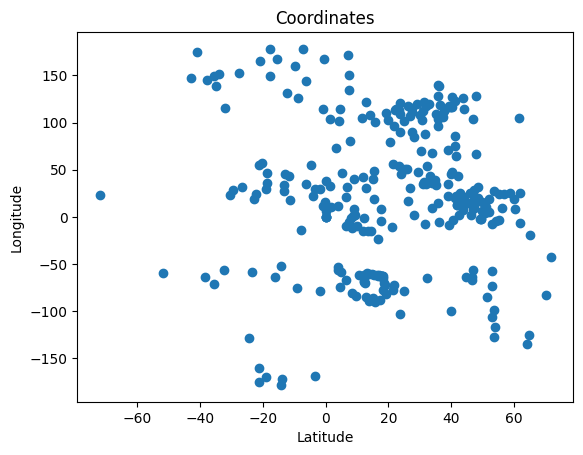

In [43]:
# 4 selezionare le colonne da analizzare
latitude = data_covid['Lat'].dropna()
longitude = data_covid['Long'].dropna()
# 5 visualizzare un grafico a dispersione
plt.scatter(latitude, longitude)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Coordinates')
plt.show()
# ci da le relazioni tra le due variabili continue
# scatter crea un grafo a dispersione, impostando le etichette x e y, ed infine title
# show per mostrare il grafo

In [44]:
# 6 Coefficiente di correlazione tra le due colonne
coeff_corr = latitude.corr(longitude)
print("Il coefficiente di correlazione è:", coeff_corr)
# forza delle relazioni tra le due variabili


Il coefficiente di correlazione è: -0.049886251752468025


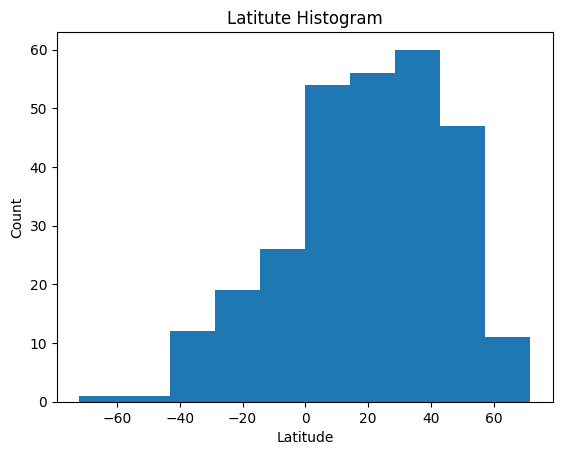

In [45]:
# 7 creare un istogramma per analizzare la distrubuzione dei valori della colonna1
plt.hist(latitude, bins=10) # hist per gli istogrammi
plt.xlabel('Latitude')
plt.ylabel('Count')
plt.title('Latitute Histogram')
plt.show()
# distribuzione di una variabile continua

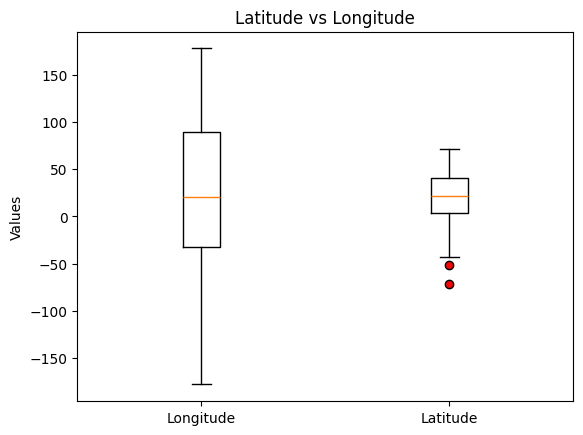

In [62]:
# 8 boxplot per visualizzare la distribuzione dei valori nella colonna 2
# droppare i NaN per i boxplot
# plt.boxplot(longitude)
# plt.ylabel('Longitude')
# plt.title('Boxplot')
# plt.show()

# plt.boxplot([longitude, latitude], labels=['Longitude', 'Latitude'])
plt.boxplot([longitude, latitude], tick_labels=['Longitude', 'Latitude'], flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))
plt.ylabel('Values')
plt.title('Latitude vs Longitude')
plt.show()

In [ ]:
'''
BOXPLOT:
è una rappresentazione grafica utilizzaa per descrivere la distribuzione di un campione tramite semplici indici di dispersione.
nel box abbiamo:
- Il minimo
- il massimo
- le anomalie indicate con un cerchietto vuoto, di solito fuori dal minimo o massimo
- il primo quartile dal lato del minimo
- il terzo quartile dal lato del massimo
- il secondo quartile in mezzo che indica la mediana dei dati
mediana: il valore di modalità assunto dalle unità statistiche che si trovano nel mezzo della distribuzione
    la mediana è un indice di posizione
media: un singolo valore numerico che descrive sinteticamente un insieme di dati. Esistono 3 tipi di medie,
    ma nel linguaggio comune si intende quella aritmetica
moda: di una distribuzione X è la modalità caratterizzata dalla massima frequenza (il valore che compare più frequentemente)
std (deviazione standard): è un indice di dispersione statistica, un indicatore usato per fornire una stima
    sintetica della variabilità di una popolazione di dati o di una variabile casuale
'''

Index(['id', 'nome', 'età', 'paese', 'stipendio', 'data_assunzione', 'bonus'], dtype='object')


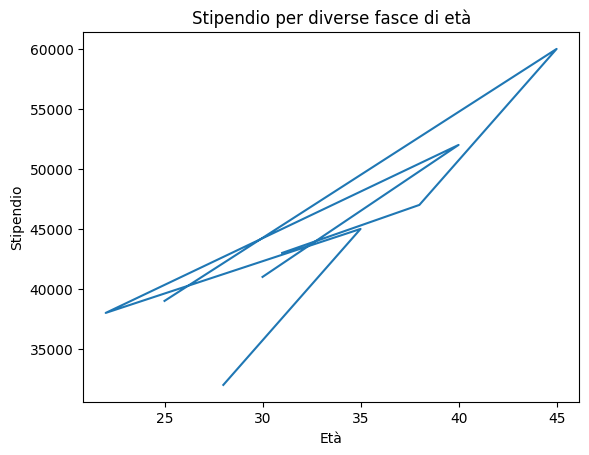

In [ ]:
# 9 grafico a linee per vedere l'andamento dei valori della colonna 1
print(dataset.columns)
età = dataset['età']
stipendio = dataset['stipendio']
bonus = dataset['bonus']
plt.plot(età, stipendio)
plt.xlabel('Età')
plt.ylabel('Stipendio')
plt.title('Stipendio per diverse fasce di età')
plt.show()

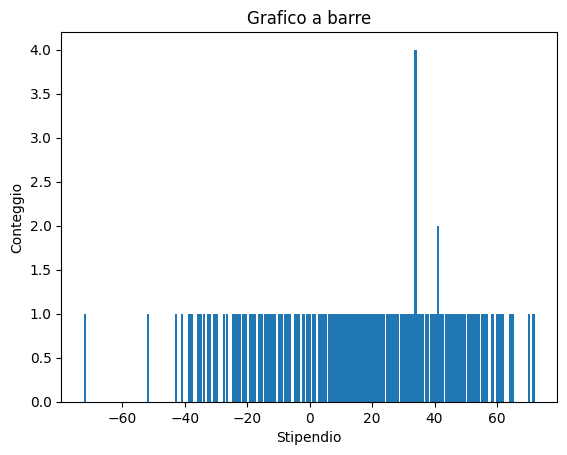

In [61]:
# 10 grafico a barre per analizzare la distribuzione dei valori di una terza colonna
plt.bar(latitude.unique(), latitude.value_counts())
plt.xlabel('Stipendio')
plt.ylabel('Conteggio')
plt.title('Grafico a barre')
plt.show()